<a href="https://colab.research.google.com/github/tmengab/lectureCode-sp23/blob/main/HSIanalyst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving HSI.xlsx to HSI (16).xlsx
Columns: Index(['Open', 'High', 'Low', 'Close', 'Up votes', 'Down votes', 'Date'], dtype='object')
            Up votes  Down votes
Date                            
2022-02-24      0.69        0.31
2022-02-25      0.36        0.64
2022-02-28      0.61        0.49
2022-03-01      0.49        0.51
2022-03-02      0.48        0.52


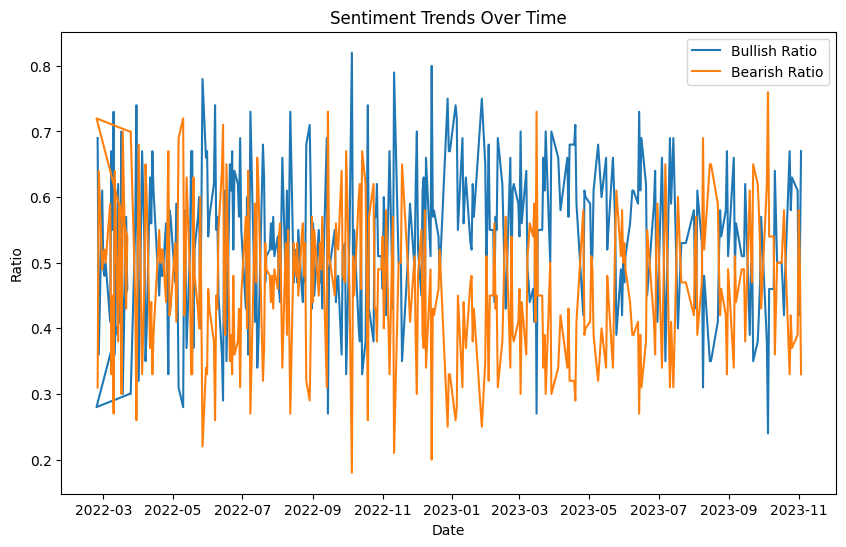

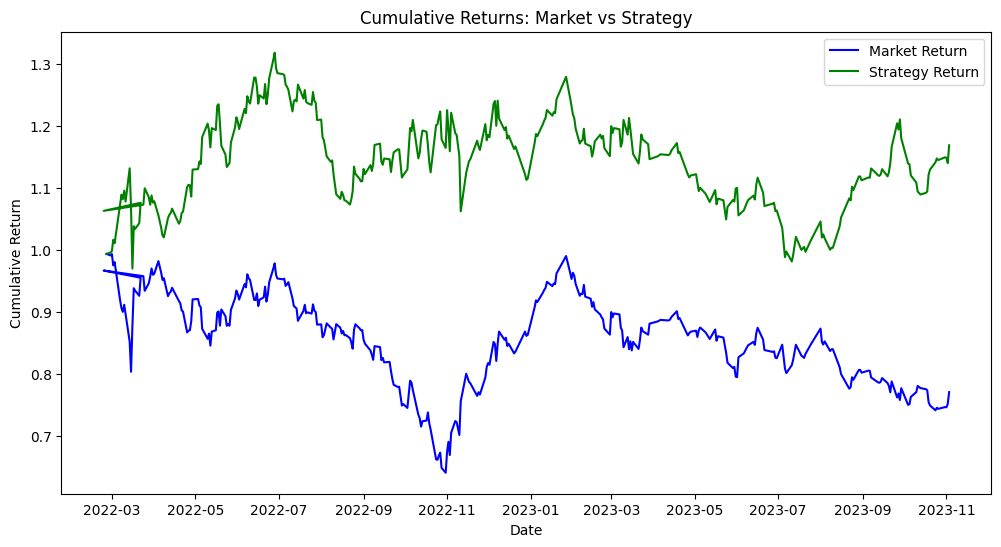

Backtest Results:
Total Market Return: -22.87%
Total Strategy Return: 16.93%
Annualized Market Return: -17.51%
Annualized Strategy Return: 12.29%
Market Volatility: 32.19%
Strategy Volatility: 32.19%
Market Sharpe Ratio: -0.54
Strategy Sharpe Ratio: 0.38
Max Drawdown (Market): -35.49%
Max Drawdown (Strategy): -25.53%


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()
# 加载数据
data = pd.read_excel('HSI.xlsx')

# 数据清洗
data.dropna(inplace=True)  # 删除缺失值
data['Date'] = pd.to_datetime(data['Date'])  # 转换日期格式
data.set_index('Date', inplace=True)  # 设置日期为索引

# 将日期索引添加为一列
data['Date'] = data.index


# 打印列名和前几行数据
print("Columns:", data.columns)
print(data[['Up votes', 'Down votes']].head())

# 可视化情绪趋势
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Up votes'], label='Bullish Ratio')
plt.plot(data.index, data['Down votes'], label='Bearish Ratio')
plt.title('Sentiment Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Ratio')
plt.legend()
plt.show()

# 生成交易信号
data['Signal'] = 0
data.loc[data['Up votes'] > 0.5, 'Signal'] = 1  # 买入信号
data.loc[data['Down votes'] > 0.49, 'Signal'] = -1  # 卖出信号

# 计算每日收益
data['Daily_Return'] = data['Close'].pct_change()  # 市场每日收益率
data['Strategy_Return'] = data['Signal'].shift(1) * data['Daily_Return']  # 策略每日收益率

# 累计收益计算
data['Cumulative_Market_Return'] = (1 + data['Daily_Return']).cumprod()  # 市场累计收益
data['Cumulative_Strategy_Return'] = (1 + data['Strategy_Return']).cumprod()  # 策略累计收益

# 绘制累计收益对比图
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Cumulative_Market_Return'], label='Market Return', color='blue')
plt.plot(data.index, data['Cumulative_Strategy_Return'], label='Strategy Return', color='green')
plt.title('Cumulative Returns: Market vs Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()

# 回测结果分析
def backtest_analysis(data):
    # 总收益
    total_market_return = data['Cumulative_Market_Return'].iloc[-1] - 1
    total_strategy_return = data['Cumulative_Strategy_Return'].iloc[-1] - 1

    # 年化收益率
    trading_days = len(data)
    annualized_market_return = (1 + total_market_return) ** (252 / trading_days) - 1
    annualized_strategy_return = (1 + total_strategy_return) ** (252 / trading_days) - 1

    # 波动率
    market_volatility = data['Daily_Return'].std() * np.sqrt(252)
    strategy_volatility = data['Strategy_Return'].std() * np.sqrt(252)

    # 夏普比率（假设无风险利率为0）
    sharpe_ratio_market = annualized_market_return / market_volatility
    sharpe_ratio_strategy = annualized_strategy_return / strategy_volatility

    # 最大回撤
    market_rolling_max = data['Cumulative_Market_Return'].cummax()
    strategy_rolling_max = data['Cumulative_Strategy_Return'].cummax()
    market_drawdown = (data['Cumulative_Market_Return'] - market_rolling_max) / market_rolling_max
    strategy_drawdown = (data['Cumulative_Strategy_Return'] - strategy_rolling_max) / strategy_rolling_max
    max_drawdown_market = market_drawdown.min()
    max_drawdown_strategy = strategy_drawdown.min()

    # 输出回测结果
    print("Backtest Results:")
    print(f"Total Market Return: {total_market_return:.2%}")
    print(f"Total Strategy Return: {total_strategy_return:.2%}")
    print(f"Annualized Market Return: {annualized_market_return:.2%}")
    print(f"Annualized Strategy Return: {annualized_strategy_return:.2%}")
    print(f"Market Volatility: {market_volatility:.2%}")
    print(f"Strategy Volatility: {strategy_volatility:.2%}")
    print(f"Market Sharpe Ratio: {sharpe_ratio_market:.2f}")
    print(f"Strategy Sharpe Ratio: {sharpe_ratio_strategy:.2f}")
    print(f"Max Drawdown (Market): {max_drawdown_market:.2%}")
    print(f"Max Drawdown (Strategy): {max_drawdown_strategy:.2%}")

# 执行回测分析
backtest_analysis(data)

